In [146]:
%load_ext autoreload
%autoreload 2
% matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 6)
sns.set_style("darkgrid")

# Plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
import GPy
from src.bo import BO
from src.models import GPyBOModel
from src.acquisition_functions import EI


def f(x):
    return np.sinc(x * 10 - 5).sum(axis=1)[:, None]


rng = np.random.RandomState(42)
x_train = rng.uniform(0, 1, 4)[:, None]
y_train = f(x_train)

# acq = EI(model, par=0.01)
kernel = GPy.kern.RBF(1)
kernel.variance.set_prior(GPy.priors.LogGaussian(0.005, 1)) # log_prior()
model = GPyBOModel(kernel=kernel, num_mcmc=0, fix_noise=True)

acq = UCB(model)
bo = BO(f, model, acquisition_function=acq, n_iter=20, bounds=np.array([[0, 1]]))
bo.run(do_plot=False)


reconstraining parameters rbf.variance


... starting round 0 / 20
... starting round 1 / 20
... starting round 2 / 20
... starting round 3 / 20
... starting round 4 / 20
... starting round 5 / 20
... starting round 6 / 20
... starting round 7 / 20
... starting round 8 / 20
... starting round 9 / 20
... starting round 10 / 20
... starting round 11 / 20
... starting round 12 / 20
... starting round 13 / 20
... starting round 14 / 20
... starting round 15 / 20
... starting round 16 / 20
... starting round 17 / 20
... starting round 18 / 20
... starting round 19 / 20


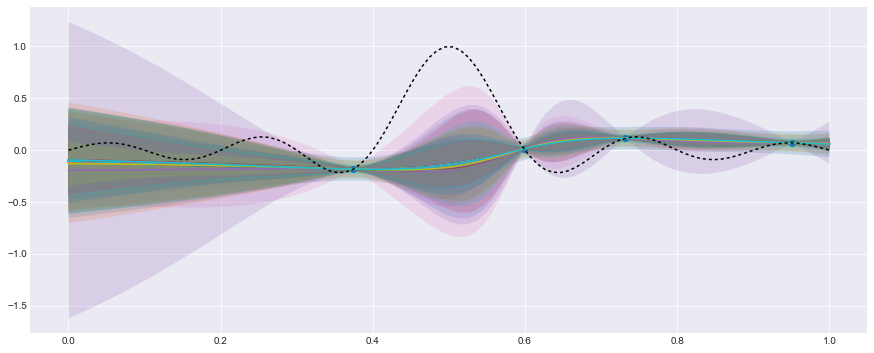

In [149]:
from src.models import *
from src.acquisition_functions import UCB
from src.neural_network import NNRegressionModel


def f(x):
    return np.sinc(x * 10 - 5).sum(axis=1)[:, None]


rng = np.random.RandomState(42)
x_train = rng.uniform(0, 1, 4)[:, None]
y_train = f(x_train)

################

nn = NNRegressionModel(input_dim=1, dim_basis=50, epochs=100, batch_size=10)
reg = BayesianLinearRegression(num_mcmc=10, burn_in=1000, mcmc_steps=1000)
model = BOModel(nn, regressor=reg)
model.init(x_train, y_train)

x = (np.linspace(0, 1, 100))[:, None]
y = f(x)
model.plot_prediction(x, y)


... starting round 0 / 20


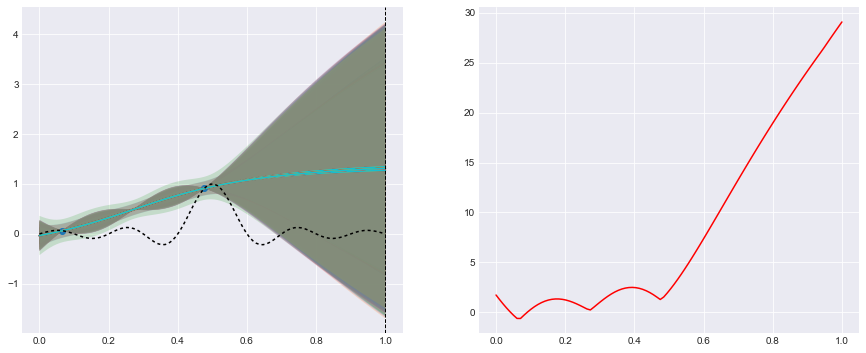

... starting round 1 / 20


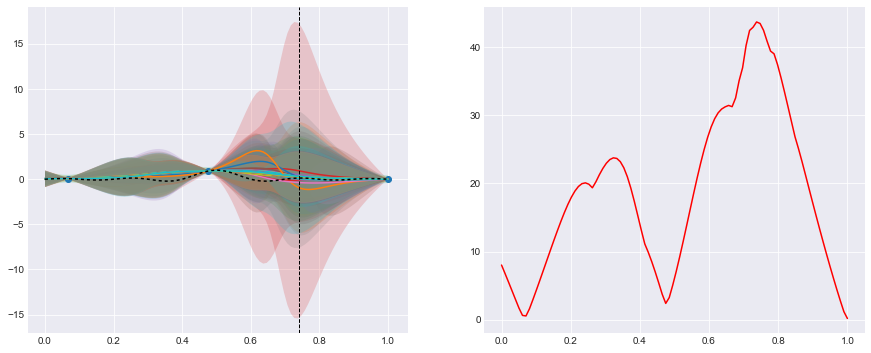

... starting round 2 / 20


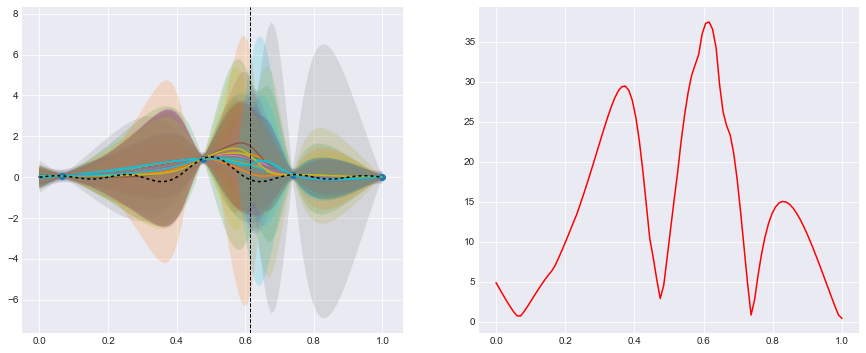

... starting round 3 / 20


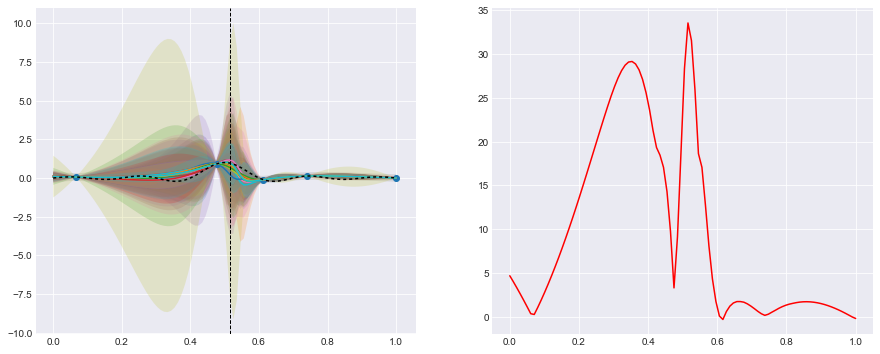

... starting round 4 / 20


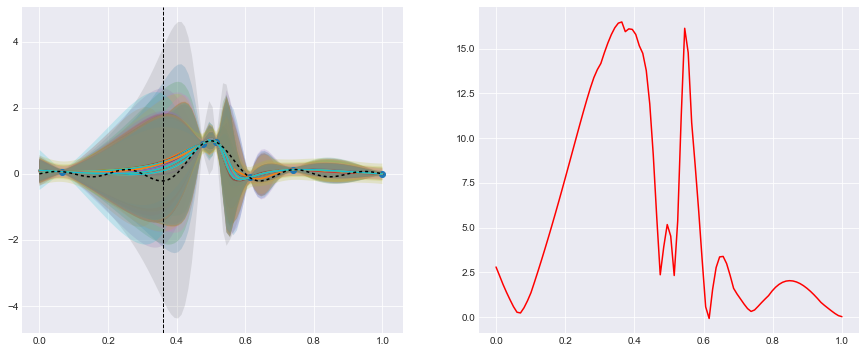

... starting round 5 / 20


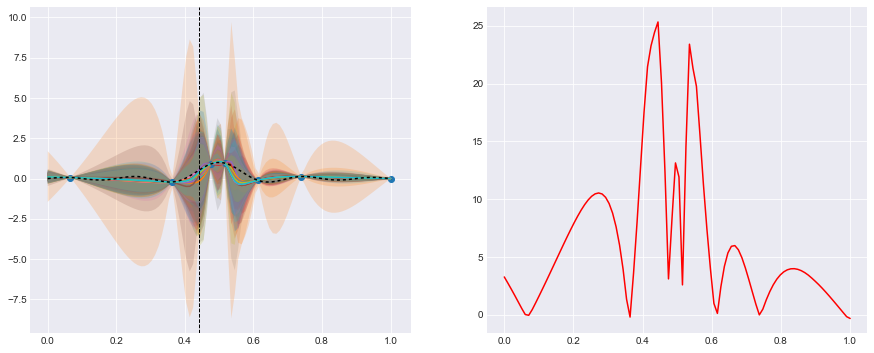

... starting round 6 / 20


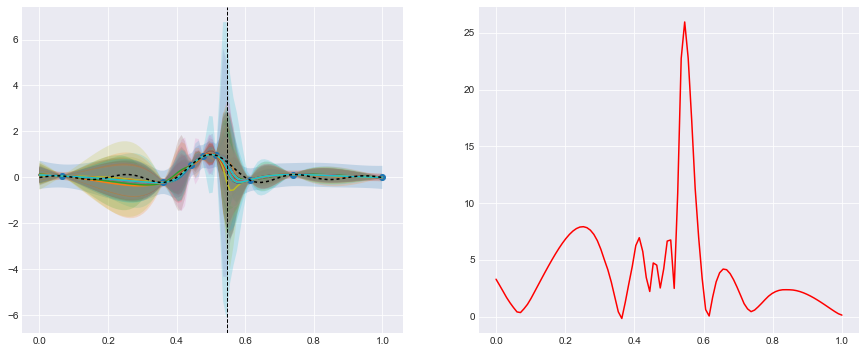

... starting round 7 / 20


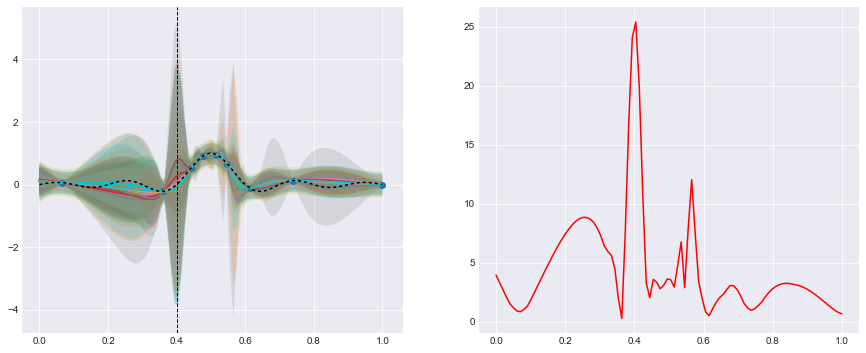

... starting round 8 / 20


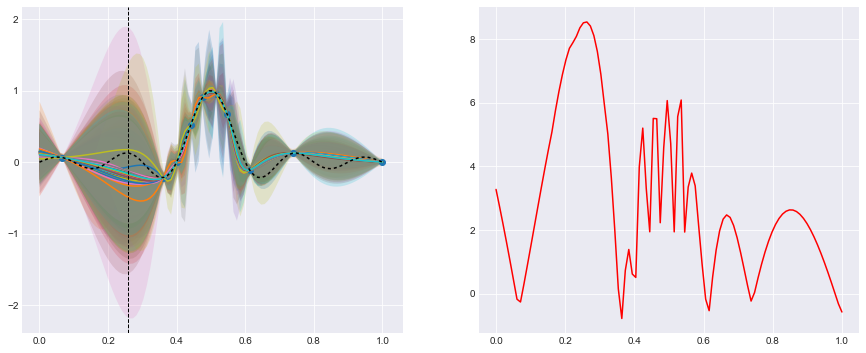

... starting round 9 / 20


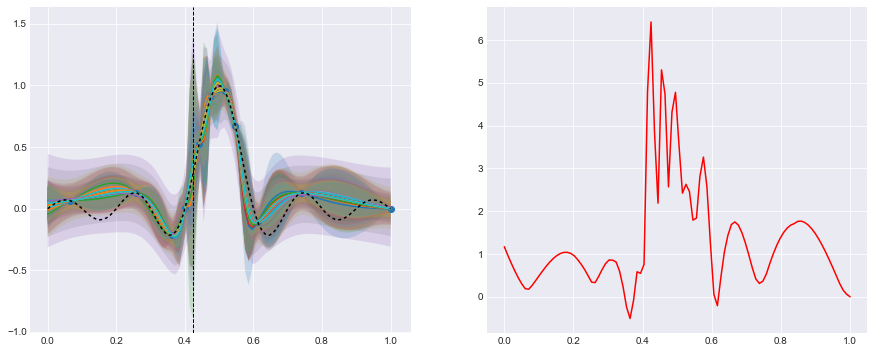

... starting round 10 / 20


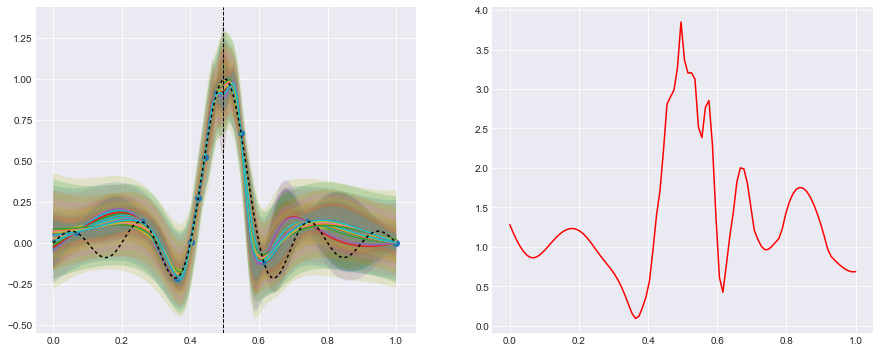

... starting round 11 / 20


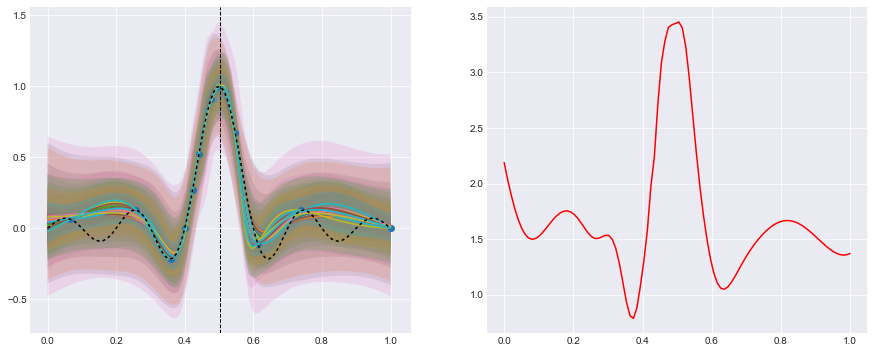

... starting round 12 / 20


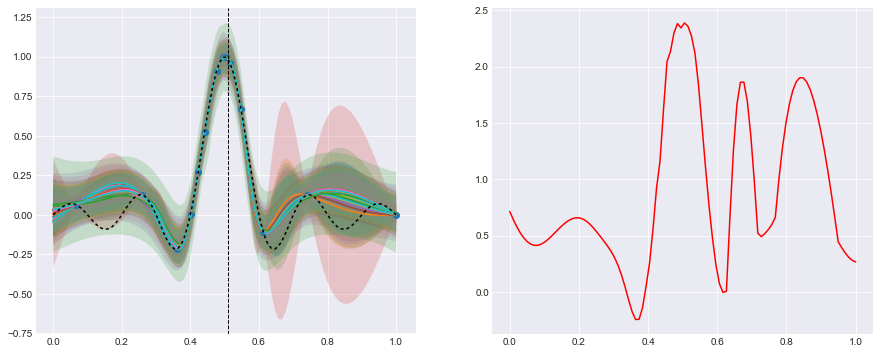

... starting round 13 / 20


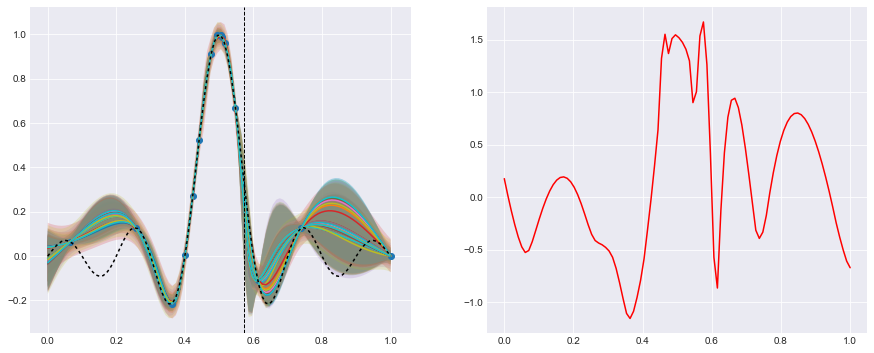

... starting round 14 / 20


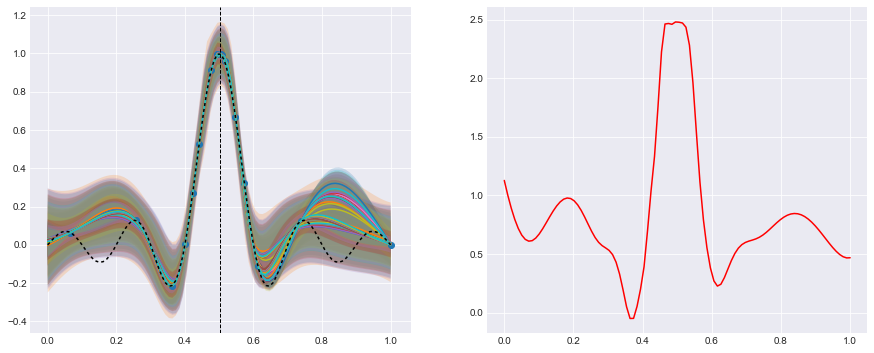

... starting round 15 / 20


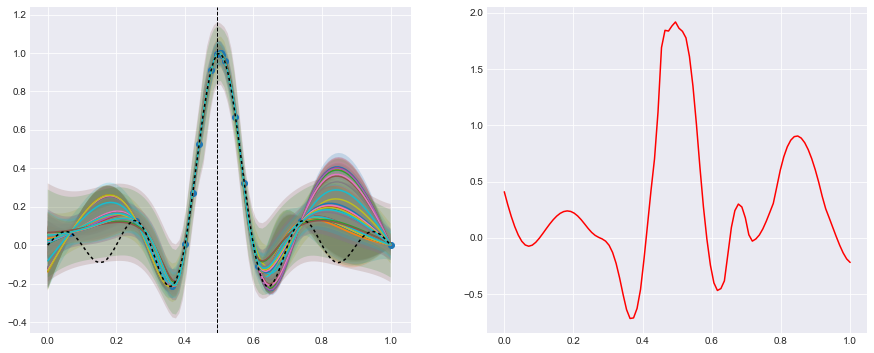

... starting round 16 / 20


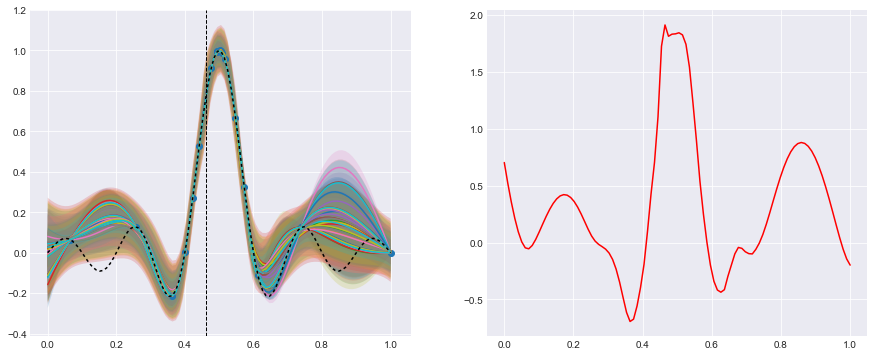

... starting round 17 / 20


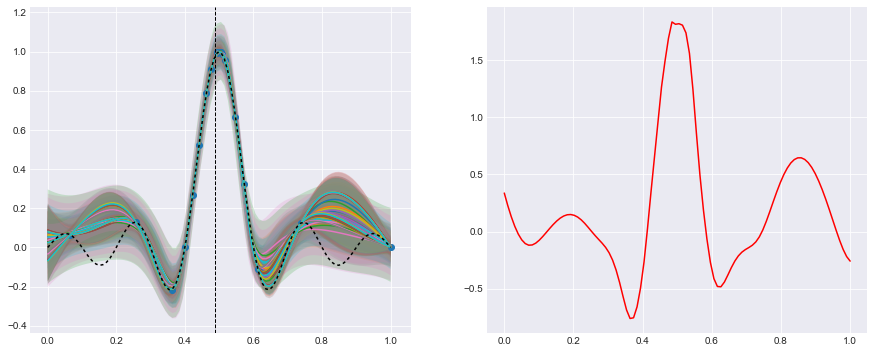

... starting round 18 / 20


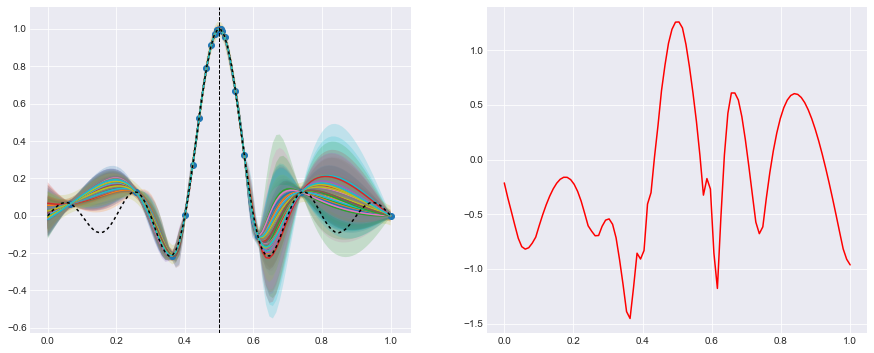

... starting round 19 / 20


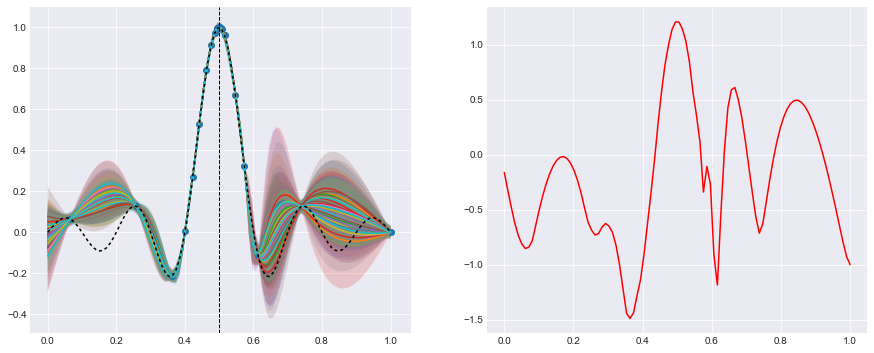

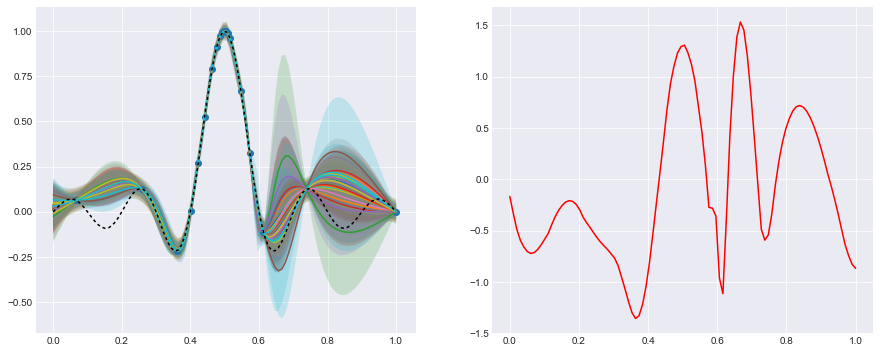

In [150]:
# acq = EI(model, par=0.01)
acq = UCB(model)
bo = BO(f, model, acquisition_function=acq, n_iter=20, bounds=np.array([[0, 1]]))
bo.run()

... starting round 0 / 3


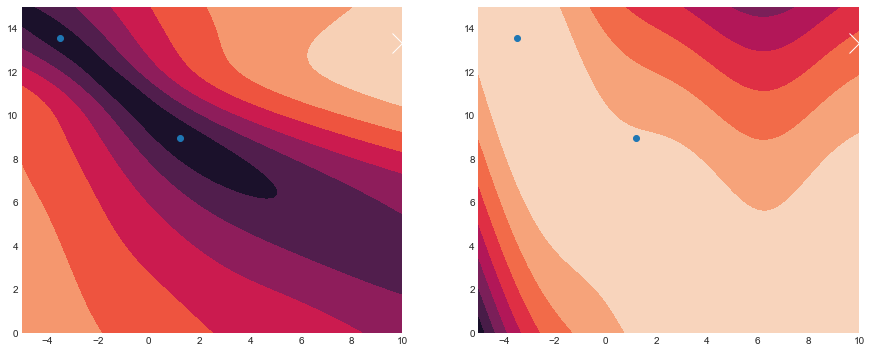

... starting round 1 / 3


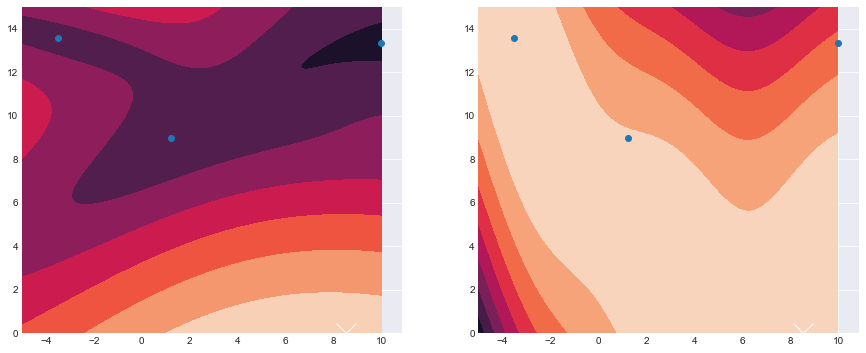

... starting round 2 / 3


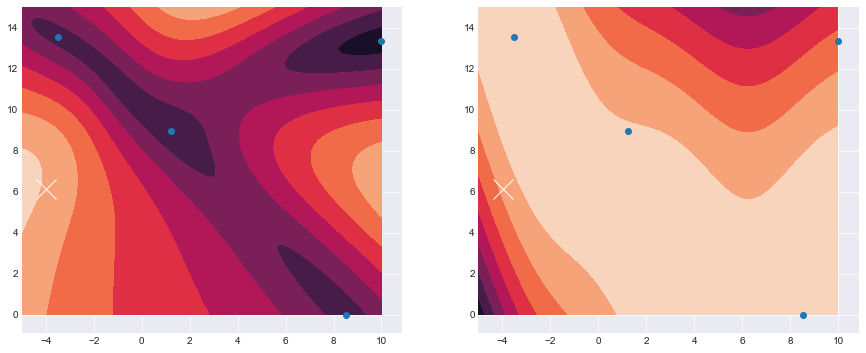

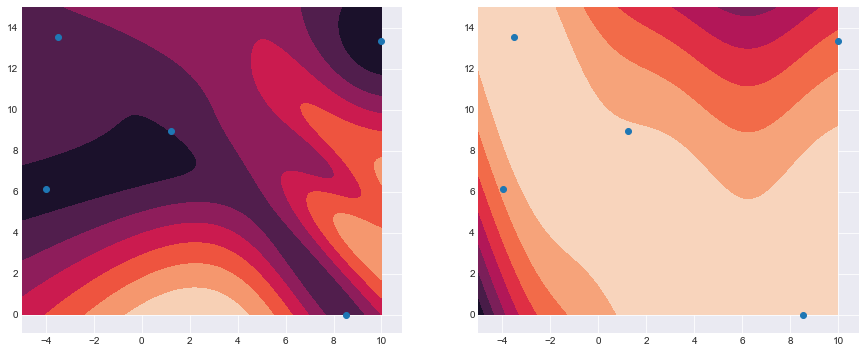

In [147]:
from src.tests import *
from hpolib.benchmarks.synthetic_functions import Branin
f, bounds, f_opt = prepare_benchmark(Branin())

boo = test_dngo_10_10_10_pe(f, bounds, 3, do_plot=True)

In [157]:
import torch
dtype = torch.float
device = torch.device("cpu")

In [161]:
# (n), (m,k) -> (n, m, k)
torch.arange(15).reshape((3,5))

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])

In [ ]:
# apply_over_axis: (n,m,k) -> (n,k)


In [148]:
import tensorflow as tf
boo.model.sess = tf.Session()
model = boo.model
model.fit(model.X, model.Y)
fig = boo.plot_2D_surface(use_plotly=True)
iplot(fig)

This is the format of your plot grid:
[ (1,1) scene1 ]  [ (1,2) scene2 ]
[ (2,1) scene3 ]  [ (2,2) scene4 ]



In [1]:
from src.tests import *

bo_models, bo_names, immediate_regret = test_multiple({
    'test_gp': test_gp,
    'test_dngo_10_10_10_marg': test_dngo_10_10_10_marg,
    'test_dngo_10_10_10_pe_ensemble': test_dngo_10_10_10_pe_ensemble,
    # 'test_dngo_50_50_50_pe': test_dngo_50_50_50_pe,
    'test_dngo_10_10_10_pe': test_dngo_10_10_10_pe,
    # 'test_dngo_50_50_50_marg': test_dngo_50_50_50_marg,
}, n_iter=50)

reconstraining parameters rbf.variance
 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


... starting round 0 / 1
... starting round 0 / 1


 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:16: RuntimeWarning:divide by zero encountered in log


... starting round 0 / 1
... starting round 0 / 1


<Figure size 640x480 with 1 Axes>

In [ ]:
from hpolib.benchmarks.synthetic_functions import Camelback
from src.tests import *

bo_models, bo_names, immediate_regret = test_multiple({
    'test_gp': test_gp,
    'test_dngo_10_10_10_marg': test_dngo_10_10_10_marg,
    'test_dngo_10_10_10_pe_ensemble': test_dngo_10_10_10_pe_ensemble,
    # 'test_dngo_50_50_50_pe': test_dngo_50_50_50_pe,
    'test_dngo_10_10_10_pe': test_dngo_10_10_10_pe,
    # 'test_dngo_50_50_50_marg': test_dngo_50_50_50_marg,
}, n_iter=200, Benchmark=Camelback)

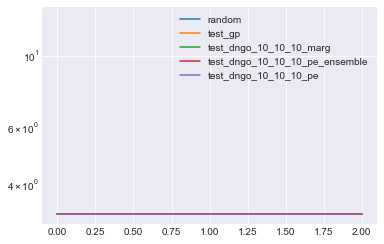

In [2]:
plot_ir(immediate_regret)
plt.legend(bo_names)
plt.show()

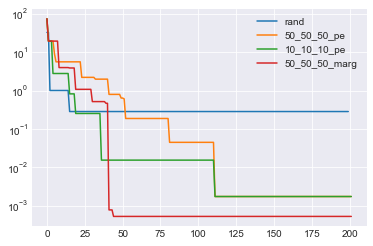

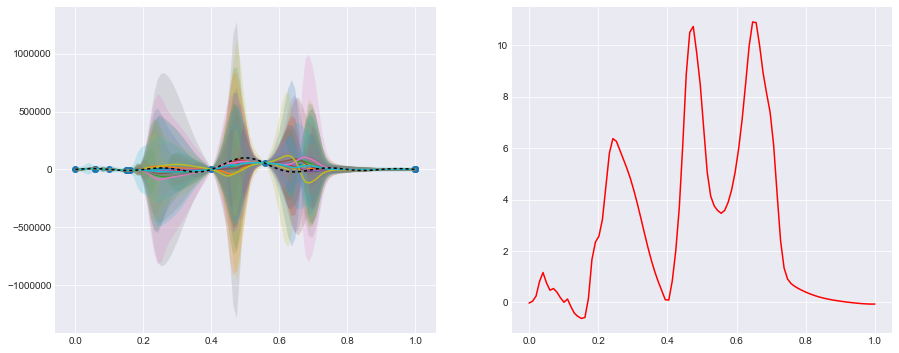

In [15]:
bo.plot_prediction()